In [1]:
import pandas as pd

df = pd.read_csv('./Data/raw1.csv')

df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace(r'[()/]', '', regex=True)
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Sample_Size', 'Total', 'Ageyears', 'Education', 'Sex', 'Income',
       'RaceEthnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [17]:
for i in df.columns:
    print(df[i].unique())

[2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]
[2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'US' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY' 'PR' 'GU' 'VI']
['Alaska' 'Alabama' 'Arkansas' 'Arizona' 'California' 'Colorado'
 'Connecticut' 'District of Columbia' 'Delaware' 'Florida' 'Georgia'
 'Hawaii' 'Iowa' 'Idaho' 'Illinois' 'Indiana' 'Kansas' 'Kentucky'
 'Louisiana' 'Massachusetts' 'Maryland' 'Maine' 'Michigan' 'Minnesota'
 'Missouri' 'Mississippi' 'Montana' 'North Carolina' 'North Dakota'
 'Nebraska' 'New Hampshire' 'New Jersey' 'New Mexico' 'Nevada' 'New York'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'National' 'Utah' 'Virginia' 'Vermont'
 'Washington' 'Wisconsi

In [14]:
print(df['ClassID'].unique())
print(df['TopicID'].unique())
print(df['QuestionID'].unique())
print(df['LocationID'].unique())
print(df['StratificationCategory1'].unique())
print(df['Stratification1'].unique())
print(df['StratificationCategoryId1'].unique())
print(df['StratificationID1'].unique())

['OWS' 'PA' 'FV']
['OWS1' 'PA1' 'FV1']
['Q036' 'Q044' 'Q037' 'Q046' 'Q045' 'Q047' 'Q043' 'Q018' 'Q019']
[ 2  1  5  4  6  8  9 11 10 12 13 15 19 16 17 18 20 21 22 25 24 23 26 27
 29 28 30 37 38 31 33 34 35 32 36 39 40 41 42 44 45 46 47 48 59 49 51 50
 53 55 54 56 72 66 78]
['Race/Ethnicity' 'Sex' 'Age (years)' 'Income' 'Education' 'Total']
['2 or more races' 'Other' 'Female' '35 - 44' '$15,000 - $24,999' 'Male'
 'Less than high school' '25 - 34' 'Non-Hispanic White' 'Asian'
 'Some college or technical school' '18 - 24' '$50,000 - $74,999'
 'Hawaiian/Pacific Islander' 'High school graduate' '$75,000 or greater'
 'American Indian/Alaska Native' 'College graduate' 'Hispanic'
 'Non-Hispanic Black' 'Less than $15,000' '55 - 64' '65 or older' 'Total'
 '$25,000 - $34,999' '45 - 54' 'Data not reported' '$35,000 - $49,999']
['RACE' 'SEX' 'AGEYR' 'INC' 'EDU' 'OVR']
['RACE2PLUS' 'RACEOTH' 'FEMALE' 'AGEYR3544' 'INC1525' 'MALE' 'EDUHS'
 'AGEYR2534' 'RACEWHT' 'RACEASN' 'EDUCOTEC' 'AGEYR1824' 'INC5075

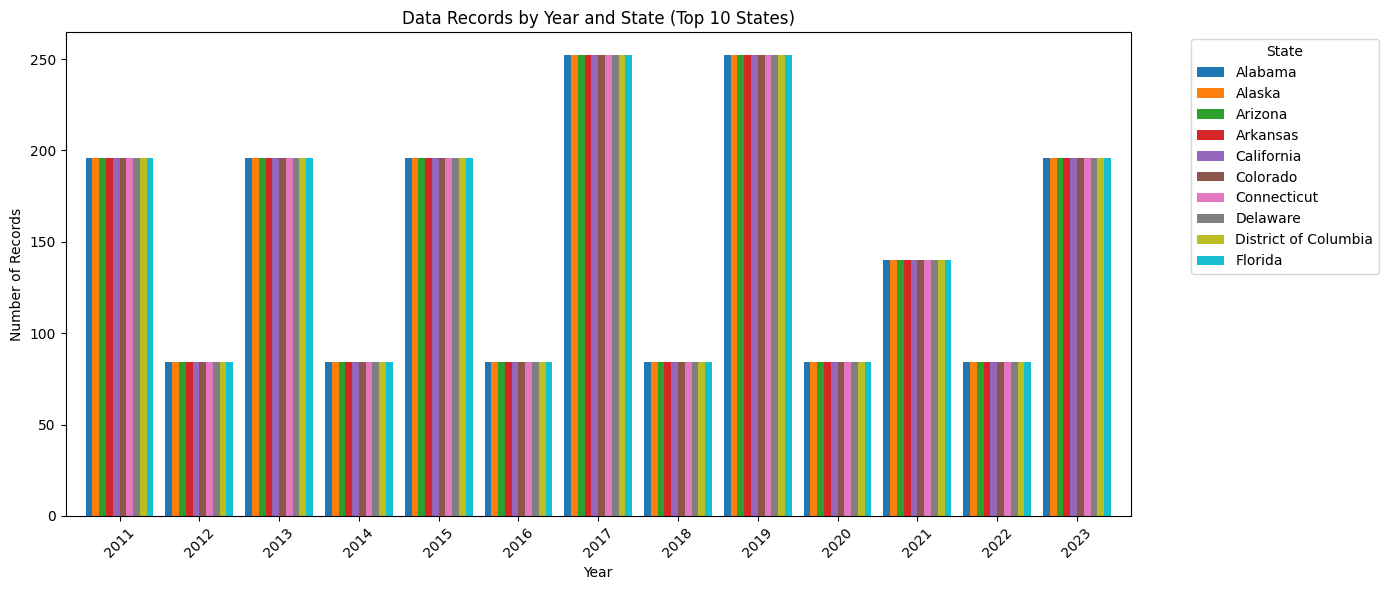

In [18]:
import matplotlib.pyplot as plt

# Group data by LocationDesc and YearStart, and count entries
state_year_counts = df.groupby(['LocationDesc', 'YearStart']).size().unstack(fill_value=0)

# Plot bar chart for the top 10 most frequently recorded states
top_states = state_year_counts.sum(axis=1).sort_values(ascending=False).head(10).index
filtered_counts = state_year_counts.loc[top_states]

# Plot
ax = filtered_counts.T.plot(kind='bar', figsize=(14, 6), width=0.85)
plt.title('Data Records by Year and State (Top 10 States)')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


In [22]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('./Data/raw1.csv')
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace(r'[()/]', '', regex=True)

# Filter top 5 states by average obesity rate
top_states = (
    df[df['QuestionID'] == 'Q036']
    .query("Stratification1 == 'Total'")
    .groupby('LocationDesc')['Data_Value'].mean()
    .sort_values(ascending=False).head(5).index.tolist()
)

obesity_df = df[
    (df['QuestionID'] == 'Q036') &
    (df['Stratification1'] == 'Total') &
    (df['LocationDesc'].isin(top_states))
]

fig = px.line(
    obesity_df,
    x='YearStart',
    y='Data_Value',
    color='LocationDesc',
    title='📈 Obesity Rate Trends (Top 5 States)',
    markers=True,
    labels={'Data_Value': 'Obesity Rate (%)'}
)
fig.show()


In [27]:
import plotly.express as px

# Filter data for Question Q043 (Physical Inactivity), Total stratification
map_df = df[
    (df['QuestionID'] == 'Q036') &
    (df['Stratification1'] == 'Total')
][['YearStart', 'LocationAbbr', 'LocationDesc', 'Data_Value']].dropna()

# Create animated map
fig = px.choropleth(
    map_df,
    locations='LocationAbbr',
    locationmode='USA-states',
    color='Data_Value',
    hover_name='LocationDesc',
    animation_frame='YearStart',  # 👈 Animate over years!
    color_continuous_scale='Blues',
    scope='usa',
    title='🛋️ Physical Inactivity by State Over Time'
)

fig.update_layout(transition={'duration': 500})
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('./Data/raw1.csv')
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace(r'[()/]', '', regex=True)

# Filter top 5 states by average obesity rate
top_states = (
    df[df['QuestionID'] == 'Q036']
    .query("Stratification1 == 'Total'")
    .groupby('LocationDesc')['Data_Value'].mean()
    .sort_values(ascending=False).head(5).index.tolist()
)

obesity_df = df[
    (df['QuestionID'] == 'Q036') &
    (df['Stratification1'] == 'Total') &
    (df['LocationDesc'].isin(top_states))
]

fig = px.line(
    obesity_df,
    x='YearStart',
    y='Data_Value',
    color='LocationDesc',
    title='📈 Obesity Rate Trends (Top 5 States)',
    markers=True,
    labels={'Data_Value': 'Obesity Rate (%)'}
)
fig.show()

import plotly.express as px

# Filter data for Question Q043 (Physical Inactivity), Total stratification
map_df = df[
    (df['QuestionID'] == 'Q036') &
    (df['Stratification1'] == 'Total')
][['YearStart', 'LocationAbbr', 'LocationDesc', 'Data_Value']].dropna()

# Create animated map
fig = px.choropleth(
    map_df,
    locations='LocationAbbr',
    locationmode='USA-states',
    color='Data_Value',
    hover_name='LocationDesc',
    animation_frame='YearStart',  # 👈 Animate over years!
    color_continuous_scale='Blues',
    scope='usa',
    title='🛋️ Physical Inactivity by State Over Time'
)

fig.update_layout(transition={'duration': 500})
fig.show()

